In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

# Laboratorio 5
## Esercizio 05.1
Utilizzando l'algoritmo di Metropolis campiono $n_{step\ graph}=10^5$ punti distribuiti secondo $|\psi_{1,0,0}|^2$ e $|\psi_{2,1,0}|^2$. Ne grafico le coordinate:

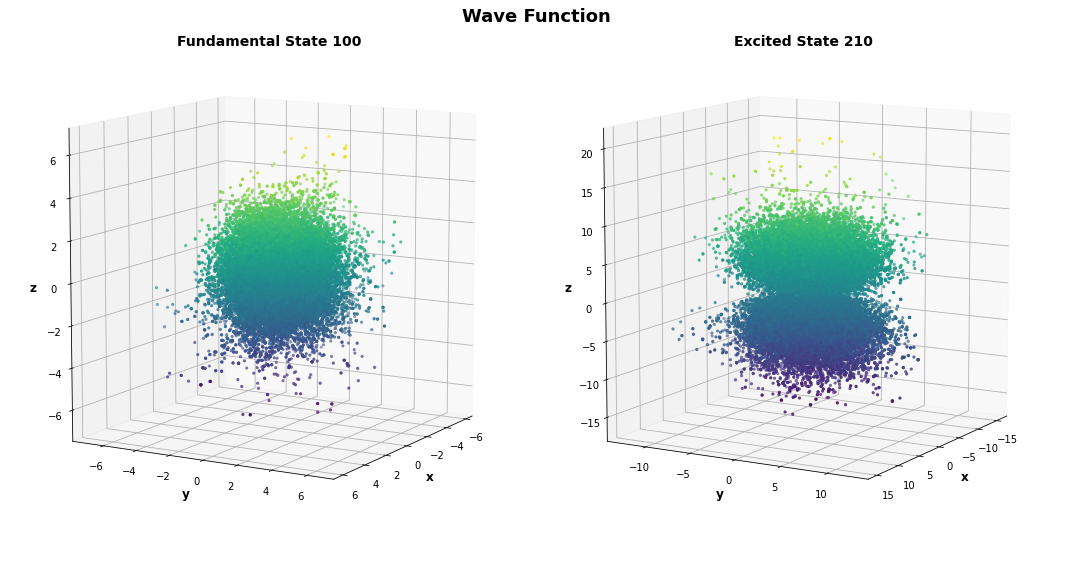

In [8]:
x100unif, y100unif, z100unif = np.loadtxt('output/graph.100unif.dat', unpack = True)
x210unif, y210unif, z210unif = np.loadtxt('output/graph.210unif.dat', unpack = True)

fig = plt.figure(figsize = (15,8))
fig.suptitle("Wave Function", fontsize = 18, fontweight = "bold")
ax = fig.add_subplot(121, projection = "3d")

ax.scatter(x100unif, y100unif, z100unif, c=z100unif, marker='.')
ax.set_xlabel('x', fontweight = "bold", fontsize = 12)
ax.set_ylabel('y', fontweight = "bold", fontsize = 12)
ax.set_zlabel('z', fontweight = "bold", fontsize = 12)
ax.set_title('Fundamental State 100', fontweight = "bold", fontsize = 14)
ax.view_init(10, 30)

ax = fig.add_subplot(122, projection = "3d")

ax.scatter(x210unif, y210unif, z210unif, c=z210unif, marker='.')
ax.set_xlabel('x', fontweight = "bold", fontsize = 12)
ax.set_ylabel('y', fontweight = "bold", fontsize = 12)
ax.set_zlabel('z', fontweight = "bold", fontsize = 12)
ax.set_title('Excited State 210', fontweight = "bold", fontsize = 14)
ax.view_init(10, 30)

plt.tight_layout()
plt.show()

Calcolo ora la media a blocchi di $r$, utilizzando una probabilità di transizione $T(\vec x|\vec y)$ uniforme e gaussiana (multivariata).

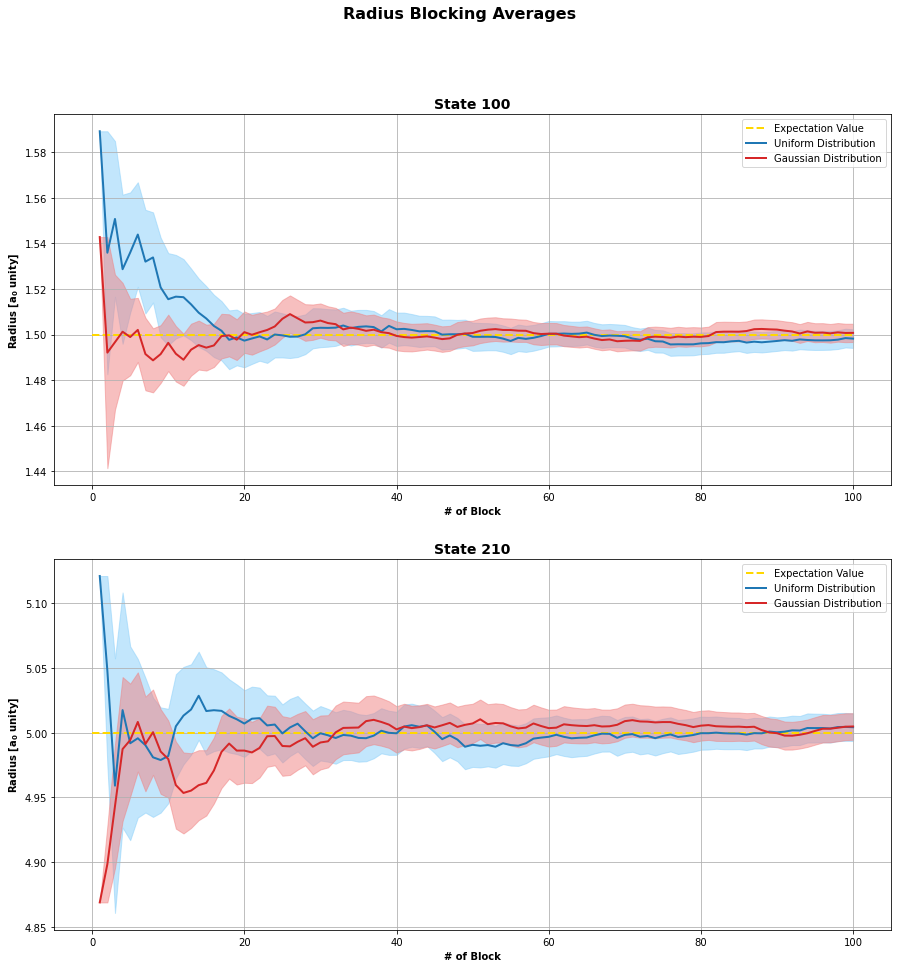

In [11]:
x100unif, inst100unif, sum_prog100unif, err_prog100unif = np.loadtxt('output/output.r100unif.0', unpack = True)
x210unif, inst210unif, sum_prog210unif, err_prog210unif = np.loadtxt('output/output.r210unif.0', unpack = True)
x100gauss, inst100gauss, sum_prog100gauss, err_prog100gauss = np.loadtxt('output/output.r100gauss.0', unpack = True)
x210gauss, inst210gauss, sum_prog210gauss, err_prog210gauss = np.loadtxt('output/output.r210gauss.0', unpack = True)


fig = plt.figure(figsize = (15,15))

fig.suptitle("Radius Blocking Averages", fontsize = 16, fontweight = "bold")
ax = fig.add_subplot(211)
hld100 = np.array([1.5 for i in range(len(x100unif)+1)])
ax.plot(hld100, '--', label = "Expectation Value", color = "gold", linewidth = 2)
ax.plot(x100unif,sum_prog100unif, linewidth = 2, label = "Uniform Distribution")
plt.fill_between(x100unif, sum_prog100unif - err_prog100unif, sum_prog100unif + err_prog100unif, color = "lightskyblue",
                alpha = 0.5)
ax.plot(x100gauss,sum_prog100gauss, linewidth = 2, color = "tab:red", label = "Gaussian Distribution")
plt.fill_between(x100gauss, sum_prog100gauss - err_prog100gauss, sum_prog100gauss + err_prog100gauss, color = "lightcoral",
                alpha = 0.5)
ax.legend()
ax.set_title(r'State 100',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Radius [$\mathbf{a_0}$ unity]', fontweight = "bold")
ax.grid()

ax = fig.add_subplot(212)
hld210 = np.array([5. for i in range(len(x210unif)+1)])
ax.plot(hld210, '--', label = "Expectation Value", color = "gold", linewidth = 2)
ax.plot(x210unif,sum_prog210unif, linewidth = 2, label = "Uniform Distribution")
plt.fill_between(x210unif, sum_prog210unif - err_prog210unif, sum_prog210unif + err_prog210unif, color = "lightskyblue",
                alpha = 0.5)
ax.plot(x210gauss,sum_prog210gauss, linewidth = 2, color = "tab:red", label = "Gaussian Distribution")
plt.fill_between(x210gauss, sum_prog210gauss - err_prog210gauss, sum_prog210gauss + err_prog210gauss, color = "lightcoral",
                alpha = 0.5)
ax.legend()

ax.set_title(r'State 210',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Radius [$\mathbf{a_0}$ unity]', fontweight = "bold")
ax.grid()





plt.show()

In entrambi i casi i risultati concordano con i valori di aspettazione $\langle r\rangle_{1,0,0}=\frac32a_0$ e $\langle r\rangle_{2,1,0}=5a_0$. Vediamo l'andamento degli errori nei due casi:

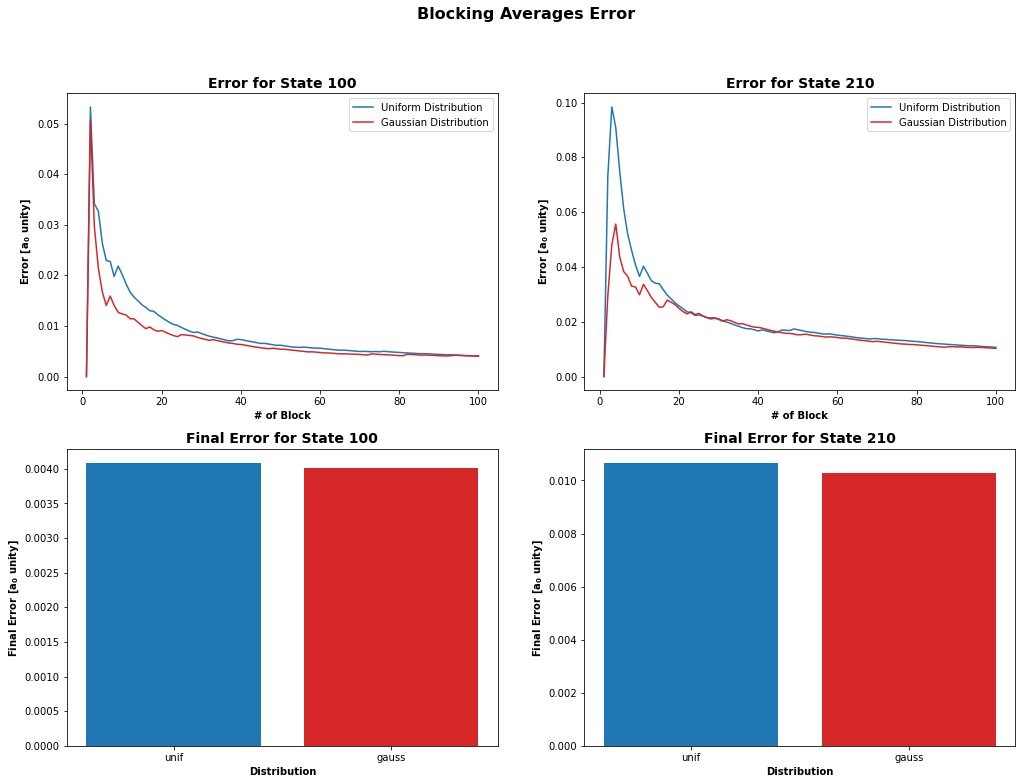

In [12]:
fig = plt.figure(figsize = (17,12))

fig.suptitle("Blocking Averages Error", fontsize = 16, fontweight = "bold")

ax = fig.add_subplot(221)
ax.plot(x100unif,err_prog100unif, label = "Uniform Distribution")
ax.plot(x100gauss,err_prog100gauss, label = "Gaussian Distribution", color = "tab:red")

ax.set_title(r'Error for State 100',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Error [$\mathbf{a_0}$ unity]', fontweight = "bold")
ax.legend()

ax = fig.add_subplot(222)
ax.plot(x210unif,err_prog210unif, label = "Uniform Distribution")
ax.plot(x210gauss,err_prog210gauss, label = "Gaussian Distribution", color = "tab:red")

ax.set_title(r'Error for State 210',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'# of Block', fontweight = "bold")
ax.set_ylabel(r'Error [$\mathbf{a_0}$ unity]', fontweight = "bold")
ax.legend()

ax = fig.add_subplot(223)
final100unif = err_prog100unif[len(err_prog100unif)-1]
final100gauss = err_prog100gauss[len(err_prog100gauss)-1]
ax.bar(("unif","gauss"), (final100unif,final100gauss), color = ("tab:blue","tab:red"))

ax.set_title(r'Final Error for State 100',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'Distribution', fontweight = "bold")
ax.set_ylabel(r'Final Error [$\mathbf{a_0}$ unity]', fontweight = "bold")

ax = fig.add_subplot(224)
final210unif = err_prog210unif[len(err_prog210unif)-1]
final210gauss = err_prog210gauss[len(err_prog210gauss)-1]
ax.bar(("unif","gauss"), (final210unif,final210gauss), color = ("tab:blue","tab:red"))

ax.set_title(r'Final Error for State 210',fontsize = 14, fontweight = "bold")
ax.set_xlabel(r'Distribution', fontweight = "bold")
ax.set_ylabel(r'Final Error [$\mathbf{a_0}$ unity]', fontweight = "bold")

plt.show()

Entrambe le modalità hanno bassi valori di errore finale: utilizzando una probabilità di transizione gaussiana si ottiene un errore inferiore.